<font size="1">  
<h1>Subject: Home Work 4<h1>
    <p>Shahrood University of Technology (SUT)<p>
    <p> Artificial Intelligence</p>
    <p> Student Number: 40103834 </p>
    <p style="color:yellow;">Author: Ehsan Paydar</p> 
    </font>  

<h1 style="color:#a21441;">Import Library</h1>

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from keras.datasets import fashion_mnist

from sklearn.linear_model import LogisticRegressionCV


<h1 style="color:#a21441;">Load Data collection Fashion MNIST</h1>


In [9]:
data = fetch_openml(name='Fashion-MNIST', version=1)


/Users/epsoft/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<h1 style="color:#a21441;">Isolation of input and output</h1>


In [11]:
X = data.data
y = data.target

 <h1 style="color:#a21441;">1.Divide the data into two sets of training and testing in a ratio of 80 to 20</h1>


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

 <h1 style="color:#a21441;">2.Normalization of training and test set inputs</h1>


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Scaling of training and test set inputs from a scale between 0 and 255 to a scale between 0 and 1
X_train /= 255.
X_test /= 255.

 <h1 style="color:#a21441;"> 3.Create a logistic regression model with specified parameters</h1>


In [15]:
model = LogisticRegression(solver='liblinear', C=0.001, multi_class='auto', random_state=0, penalty='l2')


 <h1 style="color:#a21441;"> 4.Training the model on the training and testing data and calculating the prediction accuracy</h1>


In [18]:
# Training the model on the training data
model.fit(X_train, y_train)
# Predict output for test data
y_pred = model.predict(X_test)
# Calculation of prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5762


 <h1 style="color:#a21441;"> 5. GridSearchCV </h1>


In [24]:
# Set different values for the C parameter
param_grid = {'C': [0.01, 0.05, 0.1, 0.2, 0.3]}


# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='auto', random_state=0, penalty='l2'), param_grid, cv=5)


# Train the model on training data using GridSearchCV
grid_search.fit(X_train, y_train)


# Calculation of prediction accuracy for each of the trained models
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print(f"Accuracy: {mean:.4f} (±{std:.4f}) for {params}")

Accuracy: 0.6456 (±0.0041) for {'C': 0.01}
Accuracy: 0.6772 (±0.0029) for {'C': 0.05}
Accuracy: 0.6962 (±0.0030) for {'C': 0.1}
Accuracy: 0.7134 (±0.0022) for {'C': 0.2}
Accuracy: 0.7245 (±0.0025) for {'C': 0.3}


 <h1 style="color:#a21441;"> 6. Confusion Matrix </h1>


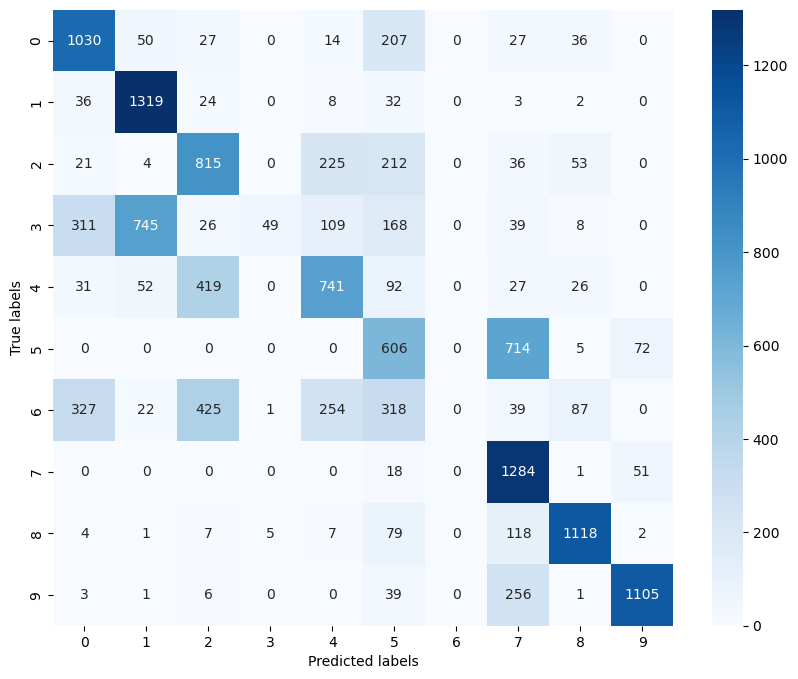

In [23]:
# Calculate the clutter matrix for the test mode
cm = confusion_matrix(y_test, y_pred)

# Draw the clutter matrix diagram
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

 <h1 style="color:#a21441;"> 7. SGDClassifier </h1>


In [ ]:
# Create SGDClassifier model
sgd_clf = SGDClassifier(random_state=0)

# Model training
sgd_clf.fit(X_train, y_train)

# Prediction of test data label
y_pred_sgd = sgd_clf.predict(X_test)


# Calculate the accuracy of the models
accuracy_logistic_reg = LogisticRegressionCV.score(X_test, y_test)
accuracy_sgd_clf = sgd_clf.score(X_test, y_test)

print(f"The accuracy of the logistic regression model is: {accuracy_logistic_reg}")
print(f"The accuracy of the SGD classifier model is: {accuracy_sgd_clf}")


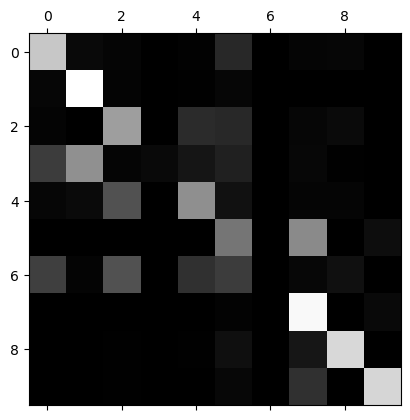

[[1030   50   27    0   14  207    0   27   36    0]
 [  36 1319   24    0    8   32    0    3    2    0]
 [  21    4  815    0  225  212    0   36   53    0]
 [ 311  745   26   49  109  168    0   39    8    0]
 [  31   52  419    0  741   92    0   27   26    0]
 [   0    0    0    0    0  606    0  714    5   72]
 [ 327   22  425    1  254  318    0   39   87    0]
 [   0    0    0    0    0   18    0 1284    1   51]
 [   4    1    7    5    7   79    0  118 1118    2]
 [   3    1    6    0    0   39    0  256    1 1105]]


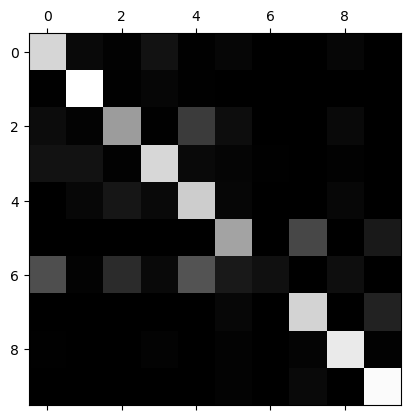

[[1142   50   11  100    8   37    3    1   35    4]
 [   7 1362   10   35    6    1    0    0    3    0]
 [  64   19  831    9  316   72    2    2   50    1]
 [  99   97   12 1144   49   31   10    1   11    1]
 [   3   40  120   50 1092   36    2    0   42    3]
 [   0    1    0    0    0  876    0  378    4  138]
 [ 418   16  230   53  443  137   89    3   79    5]
 [   0    0    0    0    0   42    0 1125    2  185]
 [   8    1    2   20    2   19    2   25 1247   15]
 [   0    0    0    0    0   20    0   50    2 1339]]


In [31]:
# Calculation of confusion matrix for logistic regression model

cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()
print(cm)


# Calculate the confusion matrix for the SGDClassifier model

cm_sgd = confusion_matrix(y_test, y_pred_sgd)
plt.matshow(cm_sgd, cmap=plt.cm.gray)
plt.show()
print(cm_sgd)